<a href="https://colab.research.google.com/github/Narendra-git26/spam_mail_prediction/blob/main/spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection & pre_processing

In [2]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')

## Exploratory Data Analysis (EDA)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Missing values per column:
Category    0
Message     0
dtype: int64


/tmp/ipython-input-514607509.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mail_data_eda['Category'] = mail_data_eda['Category'].replace({'spam': 0, 'ham': 1})
/tmp/ipython-input-514607509.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=mail_data_eda, palette='Set2')


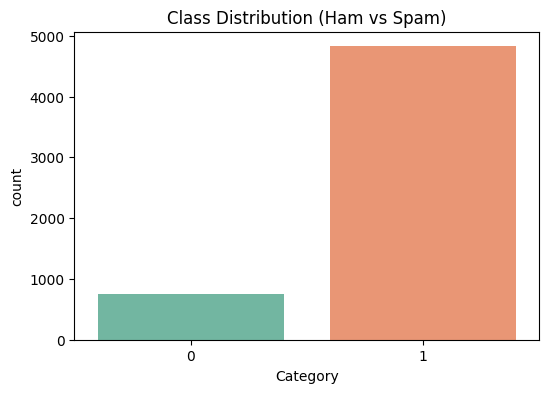

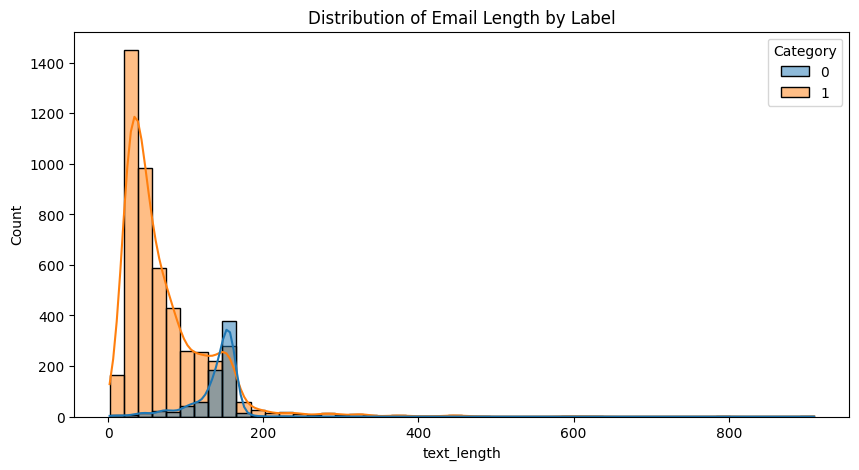

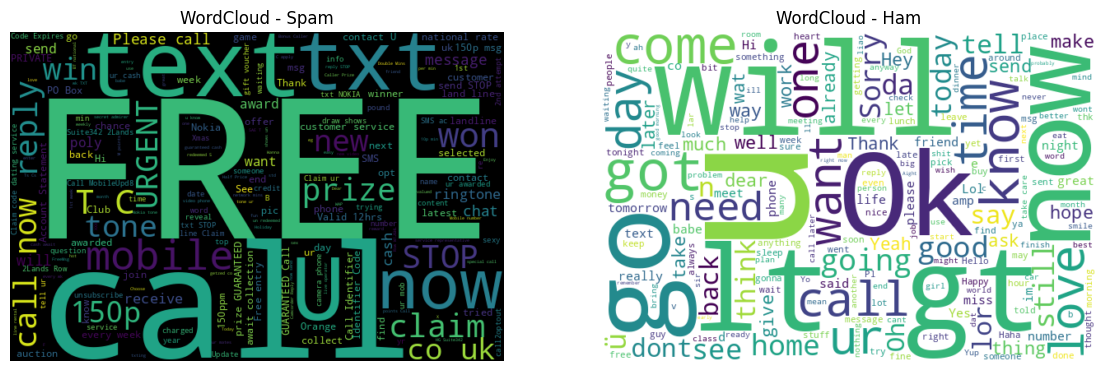

In [7]:
# ==========================
# 📊 Exploratory Data Analysis
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Check first few rows
display(raw_mail_data.head())

# Basic info
print("Dataset Info:")
print(raw_mail_data.info())

# Check missing values
print("\nMissing values per column:")
print(raw_mail_data.isnull().sum())

# Convert 'Category' to numerical labels for consistency with the rest of the notebook
mail_data_eda = raw_mail_data.copy()
mail_data_eda['Category'] = mail_data_eda['Category'].replace({'spam': 0, 'ham': 1})


# Class distribution (spam vs ham)
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=mail_data_eda, palette='Set2')
plt.title("Class Distribution (Ham vs Spam)")
plt.show()

# Length of email messages
mail_data_eda['text_length'] = mail_data_eda['Message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=mail_data_eda, x='text_length', hue='Category', bins=50, kde=True)
plt.title("Distribution of Email Length by Label")
plt.show()

# WordCloud for spam and ham
# Assuming the numerical conversion is done for EDA purposes, using original string labels for word cloud might be more intuitive
spam_words = " ".join(raw_mail_data[raw_mail_data['Category'] == 'spam']['Message'])
ham_words = " ".join(raw_mail_data[raw_mail_data['Category'] == 'ham']['Message'])

plt.figure(figsize=(14,6))

# Spam
plt.subplot(1,2,1)
wc = WordCloud(width=600, height=400, background_color="black").generate(spam_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Spam")

# Ham
plt.subplot(1,2,2)
wc = WordCloud(width=600, height=400, background_color="white").generate(ham_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Ham")

plt.show()

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# repalce the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
# printing te first five rows of the data frame
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checkig the number of row and columns in the data frame
mail_data.shape

(5572, 2)

Label encoding

In [ ]:
 # label spam mail as 0; ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam - 0

ham - 1

In [ ]:
# separating the data as texts and label

X =  mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
# transform te text data to feauture vectors that can be used as input to thhe Logistic regression

feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_feautures = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

Training te model

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the logisti egression model with the training data

model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluating the trained model

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ',accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_feautures)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ',accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


Buiding a predictive system

In [ ]:
input_mail = ["URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

if prediction[0]==1:
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
